Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Importing Data

In [2]:
df = pd.read_csv('data/Student_performance.csv')

Exploring the Data

In [3]:
df.describe()

,lunch,test_preparation_course,reading_score,writing_score,science_score,total_score
count,9976.000000,9977.000000,9975.000000,9976.000000,9977.000000,9981.000000
mean,0.644246,0.388694,70.125915,71.415798,66.063045,264.740908
std,0.478765,0.487478,19.026245,18.245360,19.324331,42.304858
min,0.000000,0.000000,17.000000,10.000000,9.000000,89.000000
25%,0.000000,0.000000,57.000000,59.000000,53.000000,237.000000
50%,1.000000,0.000000,71.000000,72.500000,67.000000,268.000000
75%,1.000000,1.000000,85.000000,85.000000,81.000000,294.000000
max,1.000000,1.000000,100.000000,100.000000,100.000000,383.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   roll_no                      9999 non-null   object 
 1   gender                       9982 non-null   object 
 2   race_ethnicity               9977 non-null   object 
 3   parental_level_of_education  9978 non-null   object 
 4   lunch                        9976 non-null   float64
 5   test_preparation_course      9977 non-null   float64
 6   math_score                   9976 non-null   object 
 7   reading_score                9975 non-null   float64
 8   writing_score                9976 non-null   float64
 9   science_score                9977 non-null   float64
 10  total_score                  9981 non-null   float64
 11  grade                        9997 non-null   object 
dtypes: float64(6), object(6)
memory usage: 937.6+ KB


In [5]:
df.shape

(10000, 12)

In [6]:
df.head()

,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
0,std-01,male,group D,some college,1.0,1.0,89,38.0,85.0,26.0,238.0,C
1,std-02,male,group B,high school,1.0,0.0,65,100.0,67.0,96.0,328.0,A
2,std-03,male,group C,master's degree,1.0,0.0,10,99.0,97.0,58.0,264.0,B
3,std-04,male,group D,some college,1.0,1.0,22,51.0,41.0,84.0,198.0,D
4,std-05,male,group C,some college,0.0,1.0,26,58.0,64.0,65.0,213.0,C


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

roll_no                         1
gender                         18
race_ethnicity                 23
parental_level_of_education    22
lunch                          24
test_preparation_course        23
math_score                     24
reading_score                  25
writing_score                  24
science_score                  23
total_score                    19
grade                           3
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isna().sum()

roll_no                        0
gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
science_score                  0
total_score                    0
grade                          0
dtype: int64

In [11]:
df.nunique()

roll_no                        9787
gender                            5
race_ethnicity                   11
parental_level_of_education       6
lunch                             2
test_preparation_course           2
math_score                       99
reading_score                    84
writing_score                    91
science_score                    92
total_score                     256
grade                             5
dtype: int64

In [12]:
df['gender'].value_counts()

gender
female    4918
male      4853
Girl        10
Boy          5
\tmale       1
Name: count, dtype: int64

In [13]:
df['gender'] = df['gender'].str.replace("Girl", 'female')
df['gender'] = df['gender'].str.replace("Boy", 'male')
df['gender'] = df['gender'].str.replace(r"\tmale", 'male')

In [14]:
df['gender'].value_counts()

gender
female    4928
male      4859
Name: count, dtype: int64

In [15]:
df['race_ethnicity'].value_counts()

race_ethnicity
group C      2854
group D      2523
group B      1868
group E      1486
group A      1038
D               6
group C\n       4
C               3
E               3
B               1
A               1
Name: count, dtype: int64

In [16]:
df['race_ethnicity'] = df['race_ethnicity'].astype(str)

In [17]:
df['race_ethnicity'] = df['race_ethnicity'].apply(lambda x: 'group ' + x if not x.startswith('group ') else x)

In [18]:
df['race_ethnicity'] = df['race_ethnicity'].str.replace(r"group C\n", 'group C')

In [19]:
df['race_ethnicity'].value_counts()

race_ethnicity
group C    2861
group D    2529
group B    1869
group E    1489
group A    1039
Name: count, dtype: int64

In [20]:
df['parental_level_of_education'].value_counts()

parental_level_of_education
some college          2227
high school           1952
associate's degree    1869
some high school      1707
bachelor's degree     1335
master's degree        697
Name: count, dtype: int64

In [21]:
df['grade'].value_counts()

grade
B       5544
C       2628
A        895
D        659
Fail      61
Name: count, dtype: int64

In [22]:
df['math_score'].value_counts()

math_score
27      228
58      192
100     180
64      177
51      175
       ... 
7         6
6         5
5         2
4         1
\t41      1
Name: count, Length: 99, dtype: int64

In [23]:
df['math_score'].info()

<class 'pandas.core.series.Series'>
Index: 9787 entries, 0 to 9999
Series name: math_score
Non-Null Count  Dtype 
--------------  ----- 
9787 non-null   object
dtypes: object(1)
memory usage: 152.9+ KB


In [24]:
df = df[pd.to_numeric(df['math_score'], errors='coerce').notna()]
df['math_score'] = df['math_score'].astype(float)

In [25]:
df['math_score'].value_counts()

math_score
27.0     228
58.0     192
100.0    180
64.0     177
51.0     175
        ... 
9.0        9
7.0        6
6.0        5
5.0        2
4.0        1
Name: count, Length: 98, dtype: int64

In [26]:
df['average_score'] = df['total_score']/4

In [27]:
df.head()

,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade,average_score
0,std-01,male,group D,some college,1.0,1.0,89.0,38.0,85.0,26.0,238.0,C,59.50
1,std-02,male,group B,high school,1.0,0.0,65.0,100.0,67.0,96.0,328.0,A,82.00
2,std-03,male,group C,master's degree,1.0,0.0,10.0,99.0,97.0,58.0,264.0,B,66.00
3,std-04,male,group D,some college,1.0,1.0,22.0,51.0,41.0,84.0,198.0,D,49.50
4,std-05,male,group C,some college,0.0,1.0,26.0,58.0,64.0,65.0,213.0,C,53.25


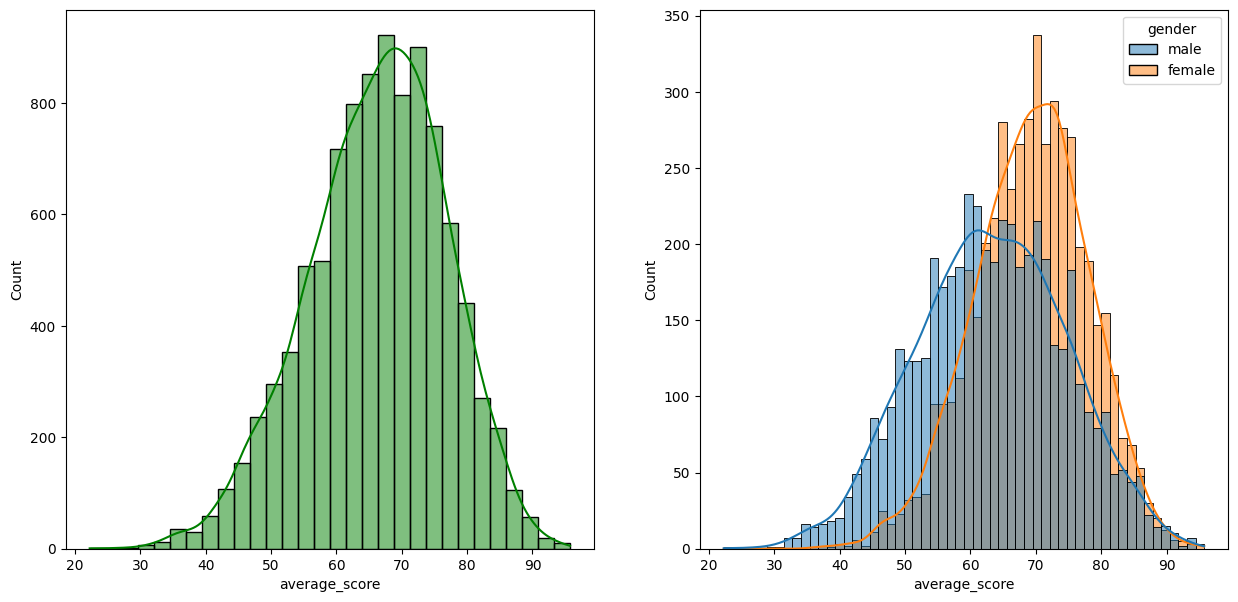

In [28]:
fig, axs = plt.subplots(1,2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df , x= 'average_score', kde= True, hue= 'gender')
plt.show()

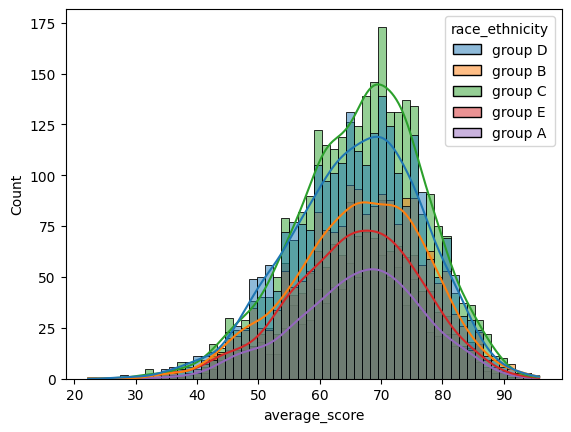

In [29]:
figsize=(15, 7)
sns.histplot(data=df , x= 'average_score', kde= True, hue= 'race_ethnicity')
plt.show()

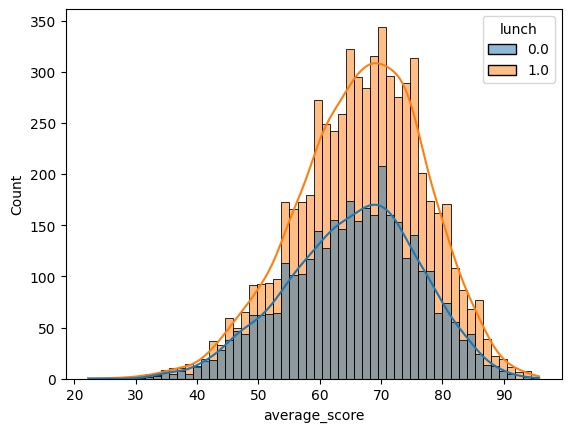

In [30]:
figsize=(15, 7)
sns.histplot(data=df , x= 'average_score', kde= True, hue= 'lunch')
plt.show()

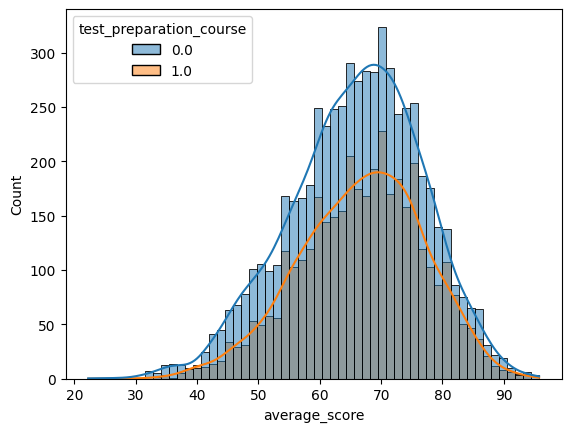

In [31]:
figsize=(15, 7)
sns.histplot(data=df , x= 'average_score', kde= True, hue= 'test_preparation_course')
plt.show()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9786 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   roll_no                      9786 non-null   object 
 1   gender                       9786 non-null   object 
 2   race_ethnicity               9786 non-null   object 
 3   parental_level_of_education  9786 non-null   object 
 4   lunch                        9786 non-null   float64
 5   test_preparation_course      9786 non-null   float64
 6   math_score                   9786 non-null   float64
 7   reading_score                9786 non-null   float64
 8   writing_score                9786 non-null   float64
 9   science_score                9786 non-null   float64
 10  total_score                  9786 non-null   float64
 11  grade                        9786 non-null   object 
 12  average_score                9786 non-null   float64
dtypes: float64(8), object(5

In [33]:
df.drop(columns=["roll_no"], inplace=True)

In [34]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade,average_score
0,male,group D,some college,1.0,1.0,89.0,38.0,85.0,26.0,238.0,C,59.50
1,male,group B,high school,1.0,0.0,65.0,100.0,67.0,96.0,328.0,A,82.00
2,male,group C,master's degree,1.0,0.0,10.0,99.0,97.0,58.0,264.0,B,66.00
3,male,group D,some college,1.0,1.0,22.0,51.0,41.0,84.0,198.0,D,49.50
4,male,group C,some college,0.0,1.0,26.0,58.0,64.0,65.0,213.0,C,53.25


In [35]:
df.to_csv('data/student_performance_cleaned.csv', index=False)